#DAA graph lab evaluation
###Name: Shankara Narayanan V
###Roll number: CB.EN.U4CSE20656


#*Question 1*
##**Design**

####As far as graph design is concerned, the orignial 2D array is considered. While the 8 path connectivity is mapped as shown below.
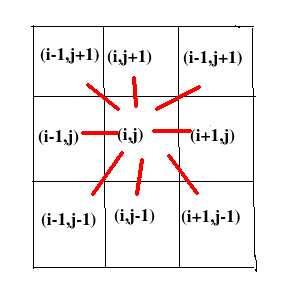

####All the elements in the dictionary are used and if their first word is present in the grid, we proceed with the DFS on each of the 8 neighbours of the selected letter of the word. 
####This method proves to be faster than running DFS on each of the grid elements (which will be O(N^4)) as DFS is run on the dictionary of words and we run a primary check of first letter being in the grid. 
###**Time complexity**: *O(sum of letters of all words)*
#### This is the case as we use a 2D array and **hash** into the 8 adjacent neighbours in O(1) time. DFS runs of each of these adjacent neighbours but if the letters of the word are not overlapping with what the DFS is finding, 'False' is returned and the DFS of the next neighbour starts hence sum of all the letters will be the time complexity.

##**Code**

In [ ]:
class worder:
  def __init__(self,word_grid,dict1):
    self.word_grid=word_grid
    self.dict1=dict1
    self.found_set=[]
    self.found_path=[]
  def dfs_grid(self,stri,j,k,m,n,i,path):
    if j>=m or k>=n or stri[i] != self.word_grid[j][k] or j<0 or k<0:
      return False
    path.append((j,k))
    if i == len(stri)-1:
      return True
    foc=self.word_grid[j][k]
    self.word_grid[j][k]='visited'

    col1=bool(self.dfs_grid(stri,j,k+1,m,n,i+1,path)) or bool(self.dfs_grid(stri,j,k-1,m,n,i+1,path)) or bool(self.dfs_grid(stri,j+1,k,m,n,i+1,path))
    col2=bool(self.dfs_grid(stri,j-1,k,m,n,i+1,path)) or bool(self.dfs_grid(stri,j+1,k+1,m,n,i+1,path))
    col3=bool(self.dfs_grid(stri,j-1,k+1,m,n,i+1,path)) or bool(self.dfs_grid(stri,j+1,k-1,m,n,i+1,path)) or bool(self.dfs_grid(stri,j-1,k-1,m,n,i+1,path))

    self.word_grid[j][k]=foc

    return bool(col1 or col2 or col3)
      
  def gridfinder(self):
    m=len(self.word_grid)
    n=len(self.word_grid[0])
    path=[]
    for i in range(len(self.dict1)):
      stri=self.dict1[i]
      
      for j in range(m):
        for k in range(n):
          if(self.dfs_grid(stri,j,k,m,n,0,path)):
            self.found_set.append(stri)
            path=path[len(path)-len(stri):]
            self.found_path.append(path)
            calc_score=2*len(stri)
            print('------------------------\nWord: '+stri+'\nScore: '+str(calc_score)+'\nPath: '+str(path))
            path=[]
  def wordfinder(self,s):
    lis=[]
    for i in self.found_set:
      if i.startswith(s):
        lis.append(i)
    print("All the words that were found which starts with \'"+s+"\' are: ",lis)


##**Output**

In [ ]:
if __name__ == '__main__':
  word_grid=[
      ['e','f','r','a'],
      ['h','g','d','r'],
      ['p','s','n','a'],
      ['e','e','b','e']
  ]
  dict1 =  ['an', 'and', 'bad', 'badge','ban', 'band', 'bane', 'bang',
    'bangs', 'bans', 'be', 'bean', 'beans', 'bear', 'beard', 'beards',
    'bee', 'been', 'beep', 'beeps', 'bees', 'dab', 'dabs', 'dane',
    'danes', 'darn', 'drab', 'ear', 'earn', 'earns', 'end', 'ends',
    'grad', 'grads', 'he', 'pen', 'pend', 'pens', 'ran', 'rang', 'range', 'see', 'seen', 'seep', 'she' ]

  wordObj=worder(word_grid,dict1)
  wordObj.gridfinder()
  wordObj.wordfinder('a')
  wordObj.wordfinder('s')

------------------------
Word: an
Score: 4
Path: [(2, 3), (2, 2)]
------------------------
Word: and
Score: 6
Path: [(2, 3), (2, 2), (1, 2)]
------------------------
Word: bad
Score: 6
Path: [(3, 2), (2, 3), (1, 2)]
------------------------
Word: badge
Score: 10
Path: [(3, 2), (2, 3), (1, 2), (1, 1), (0, 0)]
------------------------
Word: ban
Score: 6
Path: [(3, 2), (2, 3), (2, 2)]
------------------------
Word: band
Score: 8
Path: [(3, 2), (2, 3), (2, 2), (1, 2)]
------------------------
Word: bane
Score: 8
Path: [(2, 3), (2, 2), (3, 3), (3, 1)]
------------------------
Word: bang
Score: 8
Path: [(3, 2), (2, 3), (2, 2), (1, 1)]
------------------------
Word: bangs
Score: 10
Path: [(3, 2), (2, 3), (2, 2), (1, 1), (2, 1)]
------------------------
Word: bans
Score: 8
Path: [(3, 2), (2, 3), (2, 2), (2, 1)]
------------------------
Word: be
Score: 4
Path: [(3, 2), (3, 3)]
------------------------
Word: bean
Score: 8
Path: [(3, 2), (3, 3), (2, 3), (2, 2)]
------------------------
Word: bean

#*Question 2*
##**Design**
####<ins>**Justifying the graph representation**
####A graph was constructed using **adjacency list** representation. This is the best possible representation type as the question covers various aspects of graph traversals. For example, it will take only **O(n)** time to iterate through all the nodes in this represenation. This aspect will prove to be helpful when the nodes must be assigned a type (integrated or non integrated). Similarly, when performing DFS, adjacency list will give the best possible time complexity for DFS which is **O(V+E)** where V is the number of vertices and E is the number of edges
####<ins>**Justifying the node design**
####Each node is hardcoded with relevant information like the color of the node and the type of the node (integrated or non integrated). This addition will be helpful while solving the 1<sup>st</sup> and the 2<sup>nd</sup> subparts of the question as a basic traversal or look up is enough to find the type of the nodes.
####<ins>**Justifying the graph design**
####The graph too has attributes hardcoded inside the class. Ghetto attribute is used to maintain the total count of Ghettos found in the graph and node_dict, a dictionary of nodes and their corresponding types (integrated or non integrated) is present to display the colored edges of the graph.

###**Time complexity for adjacency list construction**: *O(V)*
###**Time complexity for assigning type of nodes**: *O(V)*
###**Time complexity for finding type of node**: *O(1)*
###**Time complexity for finding type of graph**: *O(V)*
###**Time complexity for finding Ghettos**: *O(V+E)*

##**Sample graph used**
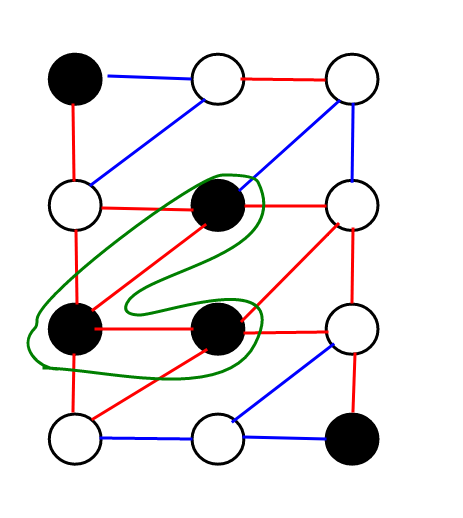

####The circled region is the possible ghetto in this graph


##**Code**

In [ ]:
class classified_node:
  def __init__(self,data,color):
    self.data=data
    self.next=None
    self.color=color
    self.n_type=None

class colored_graph:
  def __init__(self,counts):
    self.nodes_count=counts
    self.graph=[None]*self.nodes_count
    self.node_dict={}
    self.ghettos=0
  
  def add_edge(self,p1,p1_type,p2,p2_type):
    node=classified_node(p2,p2_type)
    node.next=self.graph[p1]
    self.graph[p1]=node

    node=classified_node(p1,p1_type)
    node.next=self.graph[p2]
    self.graph[p2]=node
  
  def graph_display(self):
    for i in range(self.nodes_count):
      print("("+str(i)+", "+str(self.graph[i].color)+"):",end="")
      temp=self.graph[i]
      curr_type=self.node_dict[i]
      while temp:
        if curr_type==temp.n_type:
          # print((list(self.node_dict.keys())[list(self.node_dict.values()).index(curr_type)]),temp.data)
          color='red'
        else:
          color='blue'
        print(" -{}-> ({}, {})".format(color,temp.data,temp.color), end="")
        temp=temp.next
      print('\n')  
    
  def assign_integration(self):
    for n in range(self.nodes_count):
      tmp=self.graph[n]
      my_color=tmp.color
      bl_ct,w_ct=0,0
      
      while(tmp):
        if tmp.color=='Black':
          bl_ct+=1
        else:
          w_ct+=1
        tmp=tmp.next
      if my_color=='Black' and w_ct>=bl_ct:
        self.graph[n].n_type='Integrated'
        self.node_dict[n]=self.graph[n].n_type
      else:
        self.graph[n].n_type='Not Integrated'
        self.node_dict[n]=self.graph[n].n_type
  def integrated_or_not(self,n):
    print("Node {} is {}".format(n,self.graph[n].n_type))
    
  def graph_integrated(self):
    for i in range(self.nodes_count):
      if(self.graph[i].n_type=='Not Integrated'):
        print("The graph is NOT Integrated!")
        return 
    print("The graph is Integrated")
  def ghetto_finder(self):
    print("The total number of ghettos: {}".format(self.ghettos))
  def DFSUtil(self, v, visited,ctr,colors,types):
    visited.add(v)
    # print(v, end=' ')
    temp=self.graph[v]
    colors.append(temp.color)
    types.append(temp.n_type)
    if ctr==3:
      res1 = all(ele == colors[0] for ele in colors)
      res2 = all(ele == 'Not Integrated' for ele in types)
      if res1 and res2:
        self.ghettos+=1
      ctr=0
      colors,types=[],[]
    lis=[]
    while temp:
      lis.append(temp.data)
      temp=temp.next
    for neighbour in lis:
      if neighbour not in visited:
        self.DFSUtil(neighbour, visited,ctr+1,colors,types)
  def DFS(self, v):
    visited = set()
    ctr=0
    colors,types=[],[]
    self.DFSUtil(v, visited,ctr,colors,types)

##**Outputs**

In [ ]:
if __name__ == "__main__":
    # Constructing graph1
    nodes_count_1=12
    graph1 = colored_graph(nodes_count_1)
    graph1.add_edge(0, 'Black', 1, 'White')
    graph1.add_edge(0, 'Black', 3, 'White')
    graph1.add_edge(1, 'White', 2, 'White')
    graph1.add_edge(1, 'White', 3, 'White')
    graph1.add_edge(2, 'White', 5, 'White')
    graph1.add_edge(2, 'White', 4, 'Black')
    graph1.add_edge(3, 'White', 4, 'Black')
    graph1.add_edge(3, 'White', 6, 'Black')
    graph1.add_edge(4, 'Black', 6, 'Black')
    graph1.add_edge(4, 'Black', 5, 'White')
    graph1.add_edge(5, 'White', 7, 'Black')
    graph1.add_edge(5, 'White', 8, 'White')
    graph1.add_edge(6, 'Black', 7, 'Black')
    graph1.add_edge(6, 'Black', 9, 'White')
    graph1.add_edge(7, 'Black', 8, 'White')
    graph1.add_edge(7, 'Black', 9, 'White')
    graph1.add_edge(8, 'White', 11, 'Black')
    graph1.add_edge(8, 'White', 10, 'White')
    graph1.add_edge(9, 'White', 10, 'White')
    graph1.add_edge(10, 'White', 11, 'Black')

In [ ]:
graph1.assign_integration()

In [ ]:
graph1.integrated_or_not(2)
graph1.integrated_or_not(11)

Node 2 is Integrated
Node 11 is Not Integrated


In [ ]:
graph1.graph_integrated()

The graph is NOT Integrated!


In [ ]:
graph1.graph_display()

(0, White): -red-> (3, White) -blue-> (1, White)

(1, White): -red-> (3, White) -blue-> (2, White) -blue-> (0, Black)

(2, Black): -red-> (4, Black) -blue-> (5, White) -blue-> (1, White)

(3, Black): -red-> (6, Black) -blue-> (4, Black) -blue-> (1, White) -blue-> (0, Black)

(4, White): -red-> (5, White) -blue-> (6, Black) -blue-> (3, White) -blue-> (2, White)

(5, White): -red-> (8, White) -blue-> (7, Black) -blue-> (4, Black) -blue-> (2, White)

(6, White): -red-> (9, White) -blue-> (7, Black) -blue-> (4, Black) -blue-> (3, White)

(7, White): -red-> (9, White) -blue-> (8, White) -blue-> (6, Black) -blue-> (5, White)

(8, White): -red-> (10, White) -blue-> (11, Black) -blue-> (7, Black) -blue-> (5, White)

(9, White): -red-> (10, White) -blue-> (7, Black) -blue-> (6, Black)

(10, Black): -red-> (11, Black) -blue-> (9, White) -blue-> (8, White)

(11, White): -red-> (10, White) -blue-> (8, White)



In [ ]:
graph1.DFS(0)

In [ ]:
graph1.ghetto_finder()

The total number of ghettos: 1


#*Question 3*
##**Design**
####<ins>**Justifying the graph representation**
####The order of the DNA fragments are of utmost importance hence a directed graph using adjacency list is used. As DFS will be used, adjacency list gives a decent time complexity of O(V+E).
####<ins>**Briefing about the approach**
####The total number of fragments are given and their relative positioning is given in words. Using that, a directed graph needs to be constructed. Starting from the 0th node, if we are able to DFS our way through all the elements then the fragments are reconstructable and their ordering is the same as the DFS's ordering. Else, the given fragments are not re-constructable.

###**Time complexity for adjacency list construction**: *O(V)*
###**Time complexity for running DFS**: *O(V+E)*

##**Sample graph used**
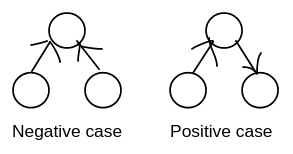
####DFS on the negative case would only cover 0<sup>th</sup> and 1<sup>st</sup> nodes hence DNA cannot be reconstruced while for the second case the DFS will reach 0<sup>th</sup>, 1<sup>st</sup> and 2<sup>nd</sup> nodes hence DNA is reconstructable.
####Each node is **hardcoded** with the fragment sequence.

In [ ]:
def DFSUtil(v, visited,graph,dfs_list):
  visited.add(v)
  dfs_list.append(v)
  for neighbour in graph[v]:
    if neighbour not in visited:
      DFSUtil(neighbour, visited,graph,dfs_list)

def DFS(v, adj):
  visited = set()
  dfs_list=[]
  DFSUtil(v, visited,adj,dfs_list)
  return dfs_list

##**Code**

In [ ]:
def addEdge(adj, u, v):
    adj[u].append(v)

def adjacencylist(adj, V):
    print("------------Directed graph of the fragments------------")
    for i in range (0, V):
        print(i, "->", end="")
         
        for x in  adj[i]:
            print(x , " ", end="")

        print()

def initGraph(V, edges, noOfEdges,fragments):

     
    adj = [0]* 3
     
    for i in range(0, len(adj)):
        adj[i] = []
   

    for i in range(0, noOfEdges) :
        addEdge(adj, edges[i][0], edges[i][1])
     

    adjacencylist(adj, V)
    dfs_list=DFS(0,adj)
    print("The DFS of the fragments results in: ",dfs_list)
    
    if len(dfs_list)!=V:
      print("The DNA sequence cannot be reconstructed!")
    else:
      print("The DNA sequence can be reconstructed!")
      for i in dfs_list:
        print(fragments[i],end=" ")


##**Output**

In [ ]:
if __name__=='__main__':
  
  fragments=['AGCTA','GTA','CAT']
  '''
  Negative case:
    In this case the fragements' positions are defined as,
    1. v1 is to the right of v0
    2. v1 is to the left of v1
  '''
  frags = 3
  edges =  [[0, 1 ],  [2, 1 ]]
  links = 2;
  initGraph(frags, edges, links,fragments)

  '''
  Positive case:
    In this case the fragements' positions are defined as,
    1. v2 is to the right of v1
    2. v1 is to the right of v0 
  '''
  frags = 3
  edges =  [[0, 1 ],  [1, 2 ]]
  links = 2;
  initGraph(frags, edges, links,fragments)




------------Directed graph of the fragments------------
0 ->1  
1 ->
2 ->1  
The DFS of the fragments results in:  [0, 1]
The DNA sequence cannot be reconstructed!
------------Directed graph of the fragments------------
0 ->1  
1 ->2  
2 ->
The DFS of the fragments results in:  [0, 1, 2]
The DNA sequence can be reconstructed!
AGCTA GTA CAT 